# Churn Prediction using ANN
Reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/11_chrun_prediction/churn.ipynb

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

In [36]:
sub_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
sub_test = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_test.csv')

## Preprocess
### Drop useless features

In [37]:
sub_train = sub_train.drop(columns=['Unnamed: 0', 'Capstone_id', 'SUB_START', 'SUB_END', 'monetary_2', 'LTV_cluster'])
sub_test = sub_test.drop(columns=['Unnamed: 0', 'Capstone_id', 'SUB_START', 'SUB_END', 'monetary_2', 'LTV_cluster'])

### One-hot cat feat

In [39]:
print(f'Before: {sub_train.shape}')
sub_train = sub_train[sub_train['CURRENT_TERM'] != 'weekly']
print(f'After: {sub_train.shape}')

Before: (67620, 12)
After: (67619, 12)


In [40]:
sub_train = pd.get_dummies(data=sub_train, columns=['BRAND','CURRENT_TERM'], dtype=int)
sub_test = pd.get_dummies(data=sub_test, columns=['BRAND','CURRENT_TERM'], dtype=int)

### Normalize RFM

In [38]:
feat_to_scale = ['recency','frequency','monetary_1']
scaler = MinMaxScaler()
sub_train[feat_to_scale] = scaler.fit_transform(sub_train[feat_to_scale])
sub_test[feat_to_scale] = scaler.fit_transform(sub_test[feat_to_scale])

In [41]:
sub_train.head(3)

,RESUBSCRIBER,recency,frequency,monetary_1,recency_cluster,frequency_cluster,monetary_cluster,segment,multi_sub,churned,BRAND_CHILLSTREAM,BRAND_CINEQUEST,BRAND_LIMELIGHT,BRAND_PULSE,BRAND_RETROREEL,CURRENT_TERM_annual,CURRENT_TERM_monthly
0,0,1.000000,0.0,0.045294,2,2,1,3,1,0,0,0,1,0,0,1,0
1,0,0.400000,0.0,0.019920,0,2,0,1,0,1,0,0,0,0,1,0,1
2,0,0.046667,0.0,0.007966,0,2,0,1,0,1,0,0,0,1,0,0,1


## Train (w/o normalization)

In [28]:
X_train = sub_train.drop('churned', axis='columns')
y_train = sub_train['churned']
X_test = sub_test.drop('churned', axis='columns')
y_test = sub_test['churned']

ann = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=100)

Epoch 1/100


/opt/anaconda3/envs/1006/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2114/2114 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8393 - loss: 0.3877
Epoch 2/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8578 - loss: 0.2948
Epoch 3/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8643 - loss: 0.2776
Epoch 4/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8777 - loss: 0.2556
Epoch 5/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8891 - loss: 0.2371
Epoch 6/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8967 - loss: 0.2245
Epoch 7/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9012 - loss: 0.2189
Epoch 8/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9067 - loss: 0.2106
Epoch 9/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9123 - loss: 0.2017
Epoch 10/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9167 - loss: 0.1954
Epoch 11/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9186 - loss: 0.1958
Epoch 12/100
2114/2114 ━━━━━━━━

In [30]:
ann.evaluate(X_test, y_test)

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9459 - loss: 0.1370


[0.13899141550064087, 0.9452073574066162]

In [31]:
y_ann = ann.predict(X_test)
y_ann[:5]

453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


array([[0.96890354],
       [0.03779906],
       [0.93765956],
       [0.99434406],
       [0.9884971 ]], dtype=float32)

In [32]:
y_pred = []
for y in y_ann:
    if y > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

### Results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7269
           1       0.96      0.93      0.94      7222

    accuracy                           0.95     14491
   macro avg       0.95      0.95      0.95     14491
weighted avg       0.95      0.95      0.95     14491



Text(95.72222222222221, 0.5, 'Truth')

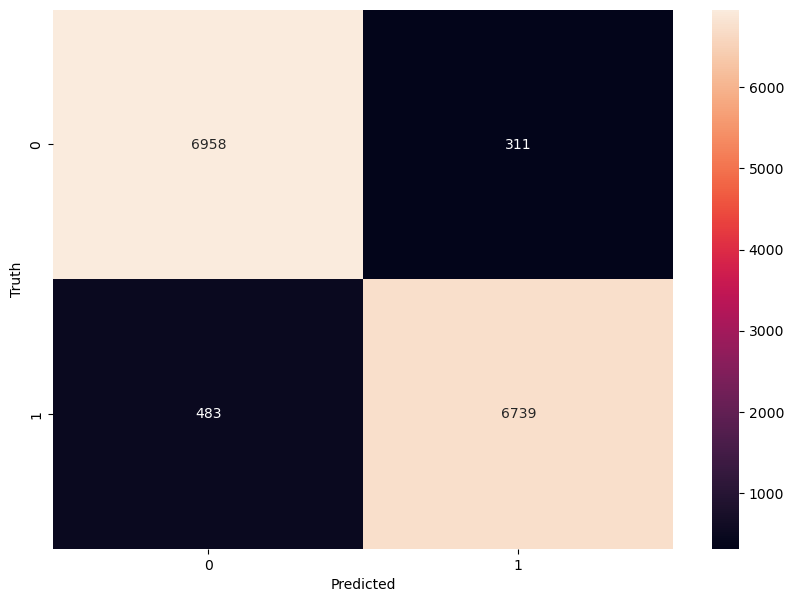

In [ ]:
print(classification_report(y_test, y_pred))

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Train (w normalization on RFM)

In [42]:
X_train = sub_train.drop('churned', axis='columns')
y_train = sub_train['churned']
X_test = sub_test.drop('churned', axis='columns')
y_test = sub_test['churned']

ann = keras.Sequential([
    keras.layers.Dense(16, input_shape=(16,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=100)

Epoch 1/100


/opt/anaconda3/envs/1006/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2114/2114 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8224 - loss: 0.4004
Epoch 2/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8474 - loss: 0.3252
Epoch 3/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8510 - loss: 0.3185
Epoch 4/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8521 - loss: 0.3066
Epoch 5/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8540 - loss: 0.2999
Epoch 6/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8680 - loss: 0.2805
Epoch 7/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8822 - loss: 0.2585
Epoch 8/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8979 - loss: 0.2419
Epoch 9/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9046 - loss: 0.2308
Epoch 10/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9067 - loss: 0.2253
Epoch 11/100
2114/2114 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9095 - loss: 0.2168
Epoch 12/100
2114/2114 ━━━━━━━━

In [43]:
ann.evaluate(X_test, y_test)
y_ann = ann.predict(X_test)
y_pred = []
for y in y_ann:
    if y > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9378 - loss: 0.1591
453/453 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


### Results

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      7269
           1       0.92      0.96      0.94      7222

    accuracy                           0.94     14491
   macro avg       0.94      0.94      0.94     14491
weighted avg       0.94      0.94      0.94     14491



Text(95.72222222222221, 0.5, 'Truth')

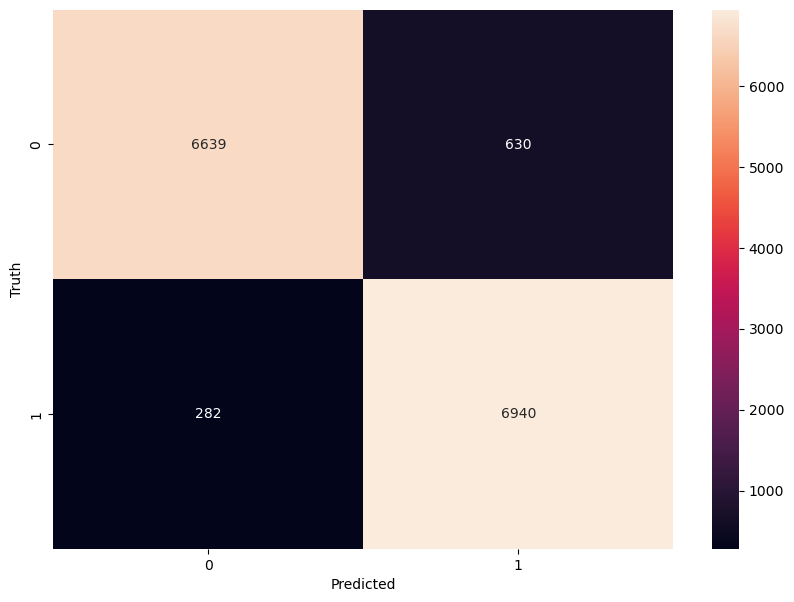

In [44]:
print(classification_report(y_test, y_pred))

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Comparison
|| |With Normalization on RFM|W/O Normalization on RFM|
|:--:|:--:|:--:|:--:|
|Accuracy||0.94|**0.95**|
|Precision|class 0|**0.96**|0.94|
||class 1|0.92|**0.96**|
|Recall|class 0|0.91|**0.96**|
||class 1|**0.96**|0.93|
|F-1 score|class 0|0.94|**0.95**|
||class1|0.94|0.94|